In [1]:
import pandas as pd
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 300)
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#plt.style.use('fivethirtyeight')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

In [9]:
with open('/home/douglas/Downloads/fire_10000_feats.pkl', 'rb') as picklefile:
    fires = pickle.load(picklefile)

In [10]:
fires.head()

,FOD_ID,SOURCE_SYSTEM_TYPE,NWCG_REPORTING_AGENCY,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,Month,DayofWeek,DISCOVERY_TIME2,COUNTY2,COUNTY_ID,Cause,Prev_Lightning_Fires,Prev_Accident_Fires,Prev_Arson_Fires,Prev_Other_Fires,Prev_A_Fires,Prev_B_Fires,Prev_C_Fires,Prev_D_Fires,Prev_E_Fires,Prev_F_Fires,Prev_G_Fires,Prev_Fires_Same_Month,Prev_Fires_Same_DayofWeek
961583,1089848,NONFED,ST/C&L,1992,1992-01-01,1,None,6.0,Railroad,10.00,C,25.950000,-80.450000,FL,Miami Dade,086,1,Wednesday,NaN,miami dade,Miami Dade,Accident,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325851,1804837,NONFED,ST/C&L,1992,1992-01-02,2,1300,7.0,Arson,17.00,C,37.490016,-81.906985,WV,McDowell,047,1,Thursday,1300.0,mcdowell,McDowell,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744923,844425,NONFED,ST/C&L,1992,1992-01-02,2,None,13.0,Missing/Undefined,1.00,B,33.558333,-80.329167,SC,14,027,1,Thursday,NaN,clarendon,45027,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52399,52822,FED,FS,1992,1992-01-04,4,1400,7.0,Arson,1.00,B,31.483333,-88.750000,MS,None,None,1,Saturday,1400.0,wayne,28153,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396378,19092298,NONFED,ST/C&L,1992,1992-01-10,10,1358,7.0,Arson,0.93,B,32.492100,-81.526300,GA,Effingham,103,1,Friday,1358.0,effingham,Effingham,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
fires.columns

Index(['FOD_ID', 'SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'FIPS_CODE', 'Month', 'DayofWeek',
       'DISCOVERY_TIME2', 'COUNTY2', 'COUNTY_ID', 'Cause',
       'Prev_Lightning_Fires', 'Prev_Accident_Fires', 'Prev_Arson_Fires',
       'Prev_Other_Fires', 'Prev_A_Fires', 'Prev_B_Fires', 'Prev_C_Fires',
       'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires', 'Prev_G_Fires',
       'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek'],
      dtype='object')

In [12]:
fires.drop(columns=['SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'FIRE_YEAR','STAT_CAUSE_CODE','COUNTY','COUNTY_ID', 'DISCOVERY_TIME'], inplace=True)
fires.shape

(10000, 28)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
fires['FIRE_SIZE_CLASS'] = le.fit_transform(fires['FIRE_SIZE_CLASS'])


In [16]:
fires[fires['FIRE_SIZE_CLASS'] == 6]

,FOD_ID,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,Month,DayofWeek,DISCOVERY_TIME2,COUNTY2,Cause,Prev_Lightning_Fires,Prev_Accident_Fires,Prev_Arson_Fires,Prev_Other_Fires,Prev_A_Fires,Prev_B_Fires,Prev_C_Fires,Prev_D_Fires,Prev_E_Fires,Prev_F_Fires,Prev_G_Fires,Prev_Fires_Same_Month,Prev_Fires_Same_DayofWeek
78408,79304,1995-07-07,188,Lightning,22092.0,6,33.950000,-111.583333,AZ,None,7,Friday,1700.0,maricopa,Lightning,0.0000,3.00,0.0,7.00,2.000,6.000,2.000,0.0,0.0000,0.0,0.0,10.0000,10.0000
84434,85390,1995-08-10,222,Campfire,12600.0,6,48.006667,-90.773333,MN,None,8,Thursday,1430.0,cook,Accident,0.0000,0.00,0.0,0.00,0.000,0.000,0.000,0.0,0.0000,0.0,0.0,0.0000,0.0000
237013,241245,1996-09-07,251,Miscellaneous,5000.0,6,41.183300,-112.867500,UT,None,9,Saturday,2340.0,box elder,Other,0.0000,0.00,0.0,2.00,0.000,2.000,0.000,0.0,0.0000,0.0,0.0,2.0000,2.0000
1090679,1328823,1997-10-24,297,Miscellaneous,43700.0,6,36.073056,-119.115000,CA,None,10,Friday,NaN,tulare,Other,2.5000,6.00,5.5,2.00,7.000,7.000,2.000,0.0,0.0000,0.0,0.0,16.0000,16.0000
240496,244979,1998-04-02,92,Missing/Undefined,20000.0,6,35.607500,-101.660000,TX,None,4,Thursday,1200.0,potter,Other,0.0000,0.00,0.0,0.00,0.000,0.000,0.000,0.0,0.0000,0.0,0.0,0.0000,0.0000
132144,133454,2000-08-14,227,Lightning,5700.0,6,45.016667,-114.750556,ID,None,8,Monday,1600.0,valley,Lightning,2.5000,0.00,0.5,1.50,3.000,1.500,0.000,0.0,0.0000,0.0,0.0,4.5000,4.5000
143926,145338,2001-08-13,225,Lightning,6144.0,6,48.788611,-118.494167,WA,None,8,Monday,1000.0,ferry,Lightning,0.5000,2.00,0.0,1.00,0.000,2.500,1.000,0.0,0.0000,0.0,0.0,3.5000,3.5000
349101,358281,2001-08-18,230,Railroad,11526.0,6,45.744300,-120.439500,WA,039,8,Saturday,1530.0,klickitat,Accident,0.0000,0.00,0.0,0.00,0.000,0.000,0.000,0.0,0.0000,0.0,0.0,0.0000,0.0000
305606,311419,2004-06-14,166,Lightning,30294.0,6,65.999700,-144.369200,AK,None,6,Monday,1736.0,yukon-koyukuk,Lightning,1.2500,2.00,0.0,0.00,1.000,1.500,0.250,0.0,0.5000,0.0,0.0,3.2500,3.2500
305685,311502,2004-07-06,188,Lightning,108577.0,6,66.524500,-151.414300,AK,None,7,Tuesday,1803.0,yukon-koyukuk,Lightning,2.2500,2.00,0.0,0.00,1.000,1.500,0.250,0.0,0.5000,0.0,1.0,4.2500,4.2500


In [17]:
fires[fires['COUNTY2'] == 'yukon-koyukuk']

,FOD_ID,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,Month,DayofWeek,DISCOVERY_TIME2,COUNTY2,Cause,Prev_Lightning_Fires,Prev_Accident_Fires,Prev_Arson_Fires,Prev_Other_Fires,Prev_A_Fires,Prev_B_Fires,Prev_C_Fires,Prev_D_Fires,Prev_E_Fires,Prev_F_Fires,Prev_G_Fires,Prev_Fires_Same_Month,Prev_Fires_Same_DayofWeek
210494,213464,1993-06-01,152,Lightning,15.0,2,64.732700,-158.669200,AK,None,6,Tuesday,1503.0,yukon-koyukuk,Lightning,0.0000,0.0,0.0,0.0,0.00,0.000,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0000
1361860,15011212,1993-07-20,201,Lightning,853.0,4,63.349998,-154.050003,AK,None,7,Tuesday,NaN,yukon-koyukuk,Lightning,1.0000,0.0,0.0,0.0,0.00,0.000,1.0000,0.0,0.000,0.0,0.0,1.0000,1.0000
210862,213834,1994-06-14,165,Lightning,456.0,4,65.649700,-143.085800,AK,None,6,Tuesday,1947.0,yukon-koyukuk,Lightning,2.0000,0.0,0.0,0.0,0.00,0.000,1.0000,0.0,1.000,0.0,0.0,2.0000,2.0000
211025,214004,1995-07-14,195,Lightning,4.0,1,64.816100,-154.635800,AK,None,7,Friday,1635.0,yukon-koyukuk,Lightning,3.0000,0.0,0.0,0.0,0.00,0.000,1.0000,0.0,2.000,0.0,0.0,3.0000,3.0000
379646,401370,1996-06-03,155,Debris Burning,3.0,1,64.683870,-148.980900,AK,None,6,Monday,NaN,yukon-koyukuk,Accident,4.0000,0.0,0.0,0.0,0.00,1.000,1.0000,0.0,2.000,0.0,0.0,4.0000,4.0000
211429,214414,1998-04-15,105,Children,0.3,1,64.749400,-156.869100,AK,None,4,Wednesday,1935.0,yukon-koyukuk,Accident,4.0000,1.0,0.0,0.0,0.00,2.000,1.0000,0.0,2.000,0.0,0.0,5.0000,5.0000
380918,403383,2002-05-17,137,Equipment Use,0.1,0,64.716350,-148.653000,AK,None,5,Friday,NaN,yukon-koyukuk,Accident,2.0000,1.5,0.0,0.0,0.00,2.000,0.5000,0.0,1.000,0.0,0.0,3.5000,3.5000
305606,311419,2004-06-14,166,Lightning,30294.0,6,65.999700,-144.369200,AK,None,6,Monday,1736.0,yukon-koyukuk,Lightning,1.2500,2.0,0.0,0.0,1.00,1.500,0.2500,0.0,0.500,0.0,0.0,3.2500,3.2500
305685,311502,2004-07-06,188,Lightning,108577.0,6,66.524500,-151.414300,AK,None,7,Tuesday,1803.0,yukon-koyukuk,Lightning,2.2500,2.0,0.0,0.0,1.00,1.500,0.2500,0.0,0.500,0.0,1.0,4.2500,4.2500
305768,311591,2004-08-25,238,Lightning,603.0,4,66.956100,-143.773200,AK,None,8,Wednesday,1140.0,yukon-koyukuk,Lightning,3.2500,2.0,0.0,0.0,1.00,1.500,0.2500,0.0,0.500,0.0,2.0,5.2500,5.2500


In [30]:
fires['STATE'] = le.fit_transform(fires['STATE'])

In [94]:
fires.head()

,FOD_ID,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,Month,DayofWeek,DISCOVERY_TIME2,COUNTY2,Cause,Prev_Lightning_Fires,Prev_Accident_Fires,Prev_Arson_Fires,Prev_Other_Fires,Prev_A_Fires,Prev_B_Fires,Prev_C_Fires,Prev_D_Fires,Prev_E_Fires,Prev_F_Fires,Prev_G_Fires,Prev_Fires_Same_Month,Prev_Fires_Same_DayofWeek
961583,1089848,1992-01-01,1,Railroad,10.00,2,25.950000,-80.450000,8,086,1,Wednesday,NaN,miami dade,Accident,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325851,1804837,1992-01-02,2,Arson,17.00,2,37.490016,-81.906985,49,047,1,Thursday,1300.0,mcdowell,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744923,844425,1992-01-02,2,Missing/Undefined,1.00,1,33.558333,-80.329167,40,027,1,Thursday,NaN,clarendon,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52399,52822,1992-01-04,4,Arson,1.00,1,31.483333,-88.750000,24,None,1,Saturday,1400.0,wayne,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396378,19092298,1992-01-10,10,Arson,0.93,1,32.492100,-81.526300,9,103,1,Friday,1358.0,effingham,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
a = fires[fires['FIRE_SIZE_CLASS'] == 0]

(array([265., 290., 348., 357., 377., 620., 541., 334., 193., 274.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

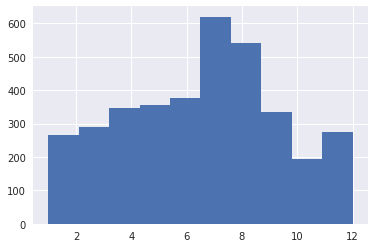

In [11]:
plt.hist(a['Month'])

(array([535., 506.,   0., 590.,   0., 472., 478.,   0., 495., 523.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

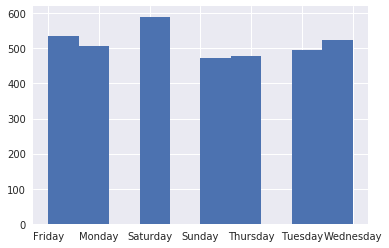

In [12]:
plt.hist(a['DayofWeek'])

In [13]:
g = fires[fires['FIRE_SIZE_CLASS'] == 6]

(array([1., 1., 1., 0., 6., 5., 0., 4., 1., 1.]),
 array([ 3. ,  3.7,  4.4,  5.1,  5.8,  6.5,  7.2,  7.9,  8.6,  9.3, 10. ]),
 <a list of 10 Patch objects>)

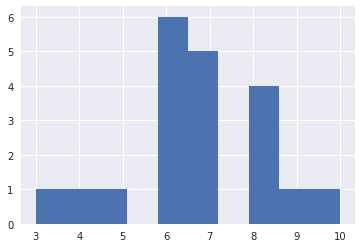

In [14]:
plt.hist(g['Month'])

(array([769., 737., 724., 392., 389., 499., 413., 309., 279., 411.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

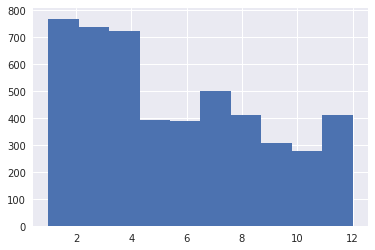

In [15]:
b = fires[fires['FIRE_SIZE_CLASS'] == 1]
plt.hist(b['Month'])

(array([1301., 1277., 1266.,  830.,  889., 1257., 1094.,  748.,  538.,
         800.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

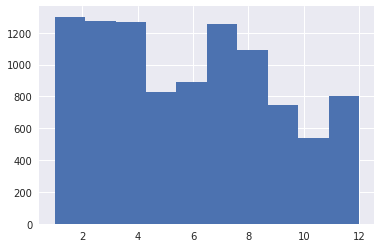

In [16]:
plt.hist(fires['Month'])
#surprisingly, there's a peak in winter that is mainly class B fires
#class G tend to happen in june, july, september

In [17]:
fires.columns

Index(['FOD_ID', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'STAT_CAUSE_DESCR',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE',
       'FIPS_CODE', 'Month', 'DayofWeek', 'DISCOVERY_TIME2', 'COUNTY2',
       'Cause', 'Prev_Lightning_Fires', 'Prev_Accident_Fires',
       'Prev_Arson_Fires', 'Prev_Other_Fires', 'Prev_A_Fires', 'Prev_B_Fires',
       'Prev_C_Fires', 'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires',
       'Prev_G_Fires', 'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek'],
      dtype='object')

In [64]:
#fires.to_csv('10k_fires.csv')

In [95]:
fires_X = pd.DataFrame(fires['Month'])
fires_y = np.array(fires['FIRE_SIZE_CLASS'])

# Try baseline

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [97]:
lr1 = LogisticRegression(C=100000)
X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3, random_state=57)

In [28]:
classes = [0, 1, 2, 3, 4, 5, 6]
lr1.fit(X_train, y_train)
lr1_preds = lr1.predict(X_test)
print('f1', f1_score(y_test, lr1_preds, labels=classes, average=None))
print('p', precision_score(y_test, lr1_preds, labels=classes, average=None))
print('r', recall_score(y_test, lr1_preds, labels=classes, average=None))

f1 [0.1977879  0.61072493 0.         0.         0.         0.
 0.        ]
p [0.38       0.47307692 0.         0.         0.         0.
 0.        ]
r [0.13368514 0.86134454 0.         0.         0.         0.
 0.        ]


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr1_preds, labels=classes))
print('f1', f1_score(y_test, lr1_preds, labels=classes, average='weighted'))
print('p', precision_score(y_test, lr1_preds, labels=classes, average='weighted'))
print('r', recall_score(y_test, lr1_preds, labels=classes, average='weighted'))

             precision    recall  f1-score   support

          0       0.38      0.13      0.20      1137
          1       0.47      0.86      0.61      1428
          2       0.00      0.00      0.00       354
          3       0.00      0.00      0.00        42
          4       0.00      0.00      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.00      0.00         8

avg / total       0.37      0.46      0.37      3000

f1 0.36566667808101905
p 0.3692046153846154
r 0.46066666666666667


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
print('Original dataset shape {}'.format(Counter(y_train)))
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_sample(X_train, y_train)
print('Oversampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 3494, 0: 2462, 2: 843, 3: 95, 4: 70, 5: 24, 6: 12})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})


In [32]:
lr1b = LogisticRegression(C=10000000)
lr1b.fit(X, y)
lr1b_preds = lr1.predict(X_test)
print('f1', f1_score(y_test, lr1b_preds, labels=classes, average=None))
print('p', precision_score(y_test, lr1b_preds, labels=classes, average=None))
print('r', recall_score(y_test, lr1b_preds, labels=classes, average=None))

f1 [0.1977879  0.61072493 0.         0.         0.         0.
 0.        ]
p [0.38       0.47307692 0.         0.         0.         0.
 0.        ]
r [0.13368514 0.86134454 0.         0.         0.         0.
 0.        ]


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, lr1b_preds, labels=classes))
print('f1', f1_score(y_test, lr1b_preds, labels=classes, average='weighted'))
print('p', precision_score(y_test, lr1b_preds, labels=classes, average='weighted'))
print('r', recall_score(y_test, lr1b_preds, labels=classes, average='weighted'))

             precision    recall  f1-score   support

          0       0.38      0.13      0.20      1137
          1       0.47      0.86      0.61      1428
          2       0.00      0.00      0.00       354
          3       0.00      0.00      0.00        42
          4       0.00      0.00      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.00      0.00         8

avg / total       0.37      0.46      0.37      3000

f1 0.36566667808101905
p 0.3692046153846154
r 0.46066666666666667


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
def test_features(X,y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)
    print('Original dataset shape {}'.format(Counter(y_test)))
    ros = RandomOverSampler(random_state=42)
    X, y = ros.fit_sample(X_train, y_train)
    print('Oversampled dataset shape {}'.format(Counter(y)))
    model.fit(X, y)
    model_preds = model.predict(X_test)
    classes = [0,1,2,3,4,5,6]
    print(classification_report(y_test, model_preds, labels=classes))
    print(confusion_matrix(y_test, model_preds, labels=classes))

In [52]:
fires['DayofWeek'] = le.fit_transform(fires['DayofWeek'])

In [46]:
fires_X = pd.DataFrame(fires[['Month', 'DayofWeek']])
fires_y = fires['FIRE_SIZE_CLASS']

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
#RF 2 features
rf1 = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
test_features(fires_X, fires_y, rf1)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.42      0.11      0.17      1137
          1       0.49      0.09      0.16      1428
          2       0.16      0.30      0.20       354
          3       0.01      0.12      0.02        42
          4       0.00      0.06      0.00        17
          5       0.01      0.29      0.01        14
          6       0.00      0.25      0.01         8

avg / total       0.41      0.12      0.16      3000

[[123  88 181 132 174 242 197]
 [135 133 370 181 194 242 173]
 [ 25  46 105  41  48  53  36]
 [  4   4  15   5   5   8   1]
 [  2   1   4   3   1   3   3]
 [  2   2   1   2   1   4   2]
 [  1   0   1   1   1   2   2]]


In [37]:
# X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3, random_state=57)
# print('Original dataset shape {}'.format(Counter(y_train)))
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_sample(X_train, y_train)
# print('Oversampled dataset shape {}'.format(Counter(y)))

# rf1 = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# rf1.fit(X_train, y_train)
# rf1_preds = rf1.predict(X_test)
# print(classification_report(y_test, rf1_preds, labels=classes))
# print('f1', f1_score(y_test, rf1_preds, labels=classes, average=None))
# print('p', precision_score(y_test, rf1_preds, labels=classes, average=None))
# print('r', recall_score(y_test, rf1_preds, labels=classes, average=None))

Original dataset shape Counter({1: 3494, 0: 2462, 2: 843, 3: 95, 4: 70, 5: 24, 6: 12})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.42      0.11      0.17      1137
          1       0.49      0.09      0.16      1428
          2       0.15      0.27      0.19       354
          3       0.01      0.12      0.02        42
          4       0.00      0.06      0.00        17
          5       0.01      0.29      0.01        14
          6       0.00      0.25      0.01         8

avg / total       0.41      0.12      0.16      3000

f1 [0.17214836 0.15628672 0.19066937 0.02457002 0.00411523 0.01408451
 0.00947867]
p [0.42123288 0.48540146 0.14873418 0.01369863 0.0021322  0.00722022
 0.00483092]
r [0.10817942 0.09313725 0.26553672 0.11904762 0.05882353 0.28571429
 0.25      ]


In [49]:
#lr 2 features
lr2 = LogisticRegression(C=100000)
test_features(fires_X, fires_y, lr2)
# lr2_preds = lr2.predict(X_test)
# print('f1', f1_score(y_test, lr2_preds, labels=classes, average=None))
# print('p', precision_score(y_test, lr2_preds, labels=classes, average=None))
# print('r', recall_score(y_test, lr2_preds, labels=classes, average=None))

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.37      0.01      0.02      1137
          1       0.00      0.00      0.00      1428
          2       0.16      0.45      0.23       354
          3       0.00      0.00      0.00        42
          4       0.00      0.06      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.50      0.01         8

avg / total       0.16      0.06      0.04      3000

[[ 13   0 276  15 335   0 498]
 [ 14   0 569  13 378   0 454]
 [  7   0 161   2  87   0  97]
 [  0   0  21   0  12   0   9]
 [  1   0   6   0   1   0   9]
 [  0   0   3   0   3   0   8]
 [  0   0   2   1   1   0   4]]


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
fires_X = pd.DataFrame(fires[['Month', 'DayofWeek', 'Prev_Lightning_Fires']])
fires_y = np.array(fires['FIRE_SIZE_CLASS'])
#X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3, random_state=57)


In [51]:
lr3 = LogisticRegression(C=100000)
test_features(fires_X, fires_y, lr3)
# lr3_preds = lr3.predict(X_test)
# print('f1', f1_score(y_test, lr3_preds, labels=classes, average=None))
# print('p', precision_score(y_test, lr3_preds, labels=classes, average=None))
# print('r', recall_score(y_test, lr3_preds, labels=classes, average=None))

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.36      0.00      0.01      1137
          1       0.51      0.01      0.03      1428
          2       0.15      0.54      0.23       354
          3       0.01      0.02      0.02        42
          4       0.00      0.06      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.25      0.00         8

avg / total       0.40      0.07      0.04      3000

[[  4  11 378  34 233 101 376]
 [  4  21 680  28 292  50 353]
 [  2   8 190   5  63  12  74]
 [  0   0  23   1   7   1  10]
 [  1   1   7   0   1   0   7]
 [  0   0   6   1   3   0   4]
 [  0   0   3   1   1   1   2]]


In [52]:
rf2 = RandomForestClassifier(n_estimators=2000, class_weight='balanced')
test_features(fires_X, fires_y, rf2)
# rf2.fit(X_train, y_train)
# rf2_preds = rf2.predict(X_test)
# print('f2', f1_score(y_test, rf2_preds, labels=classes, average=None))
# print('p', precision_score(y_test, rf2_preds, labels=classes, average=None))
# print('r', recall_score(y_test, rf2_preds, labels=classes, average=None))

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.56      0.26      0.36      1137
          1       0.45      0.16      0.24      1428
          2       0.15      0.29      0.20       354
          3       0.02      0.26      0.04        42
          4       0.00      0.12      0.01        17
          5       0.01      0.14      0.02        14
          6       0.00      0.00      0.00         8

avg / total       0.44      0.22      0.27      3000

[[297 202 190 168 163  87  30]
 [186 234 372 259 218 132  27]
 [ 40  68 102  65  47  26   6]
 [  5   7  13  11   2   3   1]
 [  2   3   4   6   2   0   0]
 [  0   4   0   4   2   2   2]
 [  1   1   1   1   3   1   0]]


In [47]:
fires_X = pd.DataFrame(fires[['Month', 'DayofWeek', 'Prev_Lightning_Fires', 'Prev_Accident_Fires',
       'Prev_Arson_Fires', 'Prev_Other_Fires']])
fires_y = np.array(fires['FIRE_SIZE_CLASS'])


In [53]:
lr4 = LogisticRegression(C=100000)
test_features(fires_X, fires_y, lr4)

# lr4_preds = lr4.predict(X_test)
# print('f1', f1_score(y_test, lr4_preds, labels=classes, average=None))
# print('p', precision_score(y_test, lr4_preds, labels=classes, average=None))
# print('r', recall_score(y_test, lr4_preds, labels=classes, average=None))
# confusion_matrix(y_test, lr4_preds)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.36      0.00      0.01      1137
          1       0.51      0.01      0.03      1428
          2       0.15      0.54      0.23       354
          3       0.01      0.02      0.02        42
          4       0.00      0.06      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.25      0.00         8

avg / total       0.40      0.07      0.04      3000

[[  4  11 378  34 233 101 376]
 [  4  21 680  28 292  50 353]
 [  2   8 190   5  63  12  74]
 [  0   0  23   1   7   1  10]
 [  1   1   7   0   1   0   7]
 [  0   0   6   1   3   0   4]
 [  0   0   3   1   1   1   2]]


In [54]:
rf3 = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
test_features(fires_X, fires_y, rf3)
# rf3.fit(X_train, y_train)
# rf3_preds = rf3.predict(X_test)
# print('f1', f1_score(y_test, rf3_preds, labels=classes, average=None))
# print('p', precision_score(y_test, rf3_preds, labels=classes, average=None))
# print('r', recall_score(y_test, rf3_preds, labels=classes, average=None))
# confusion_matrix(y_test, rf3_preds)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.55      0.27      0.36      1137
          1       0.45      0.16      0.24      1428
          2       0.14      0.26      0.19       354
          3       0.02      0.26      0.04        42
          4       0.00      0.12      0.01        17
          5       0.01      0.14      0.02        14
          6       0.00      0.00      0.00         8

avg / total       0.44      0.22      0.28      3000

[[308 202 188 165 157  87  30]
 [196 235 347 256 236 132  26]
 [ 45  67  93  64  53  26   6]
 [  5   7  12  11   3   3   1]
 [  2   3   4   6   2   0   0]
 [  0   4   0   4   2   2   2]
 [  1   1   1   1   3   1   0]]


In [56]:
fires_X = pd.DataFrame(fires[['Month', 'DayofWeek', 'Prev_A_Fires', 'Prev_B_Fires',
       'Prev_C_Fires', 'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires',
       'Prev_G_Fires']])
fires_y = np.array(fires['FIRE_SIZE_CLASS'])
#X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3)


In [57]:
rf4 = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
test_features(fires_X, fires_y, rf4)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.53      0.49      0.51      1137
          1       0.54      0.43      0.48      1428
          2       0.17      0.24      0.20       354
          3       0.01      0.02      0.01        42
          4       0.00      0.00      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.00      0.00         8

avg / total       0.48      0.42      0.44      3000

[[555 352 127  54  28  18   3]
 [386 614 268  67  48  40   5]
 [ 85 149  85  19   7   9   0]
 [ 12  14  14   1   0   1   0]
 [  7   4   4   2   0   0   0]
 [  4   2   4   2   1   0   1]
 [  4   1   1   0   1   1   0]]


In [64]:
# rf4 = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# rf4.fit(X_train, y_train)
# rf4_preds = rf4.predict(X_test)
# print('f1', f1_score(y_test, rf4_preds, labels=classes, average=None))
# print('p', precision_score(y_test, rf4_preds, labels=classes, average=None))
# print('r', recall_score(y_test, rf4_preds, labels=classes, average=None))
# confusion_matrix(y_test, rf4_preds)

f1 [0.5056926  0.51687006 0.18345865 0.02185792 0.01438849 0.
 0.        ]
p [0.52982107 0.54013503 0.20265781 0.01470588 0.00826446 0.
 0.        ]
r [0.48366606 0.4955265  0.16758242 0.04255319 0.05555556 0.
 0.        ]


array([[533, 403,  61,  41,  42,  17,   5],
       [372, 720, 173,  72,  58,  37,  21],
       [ 73, 179,  61,  20,  15,  11,   5],
       [ 17,  17,   3,   2,   4,   4,   0],
       [  6,   8,   2,   0,   1,   0,   1],
       [  3,   3,   1,   1,   1,   0,   1],
       [  2,   3,   0,   0,   0,   1,   0]])

In [137]:
fires_X = np.array(fires[['Month', 'DayofWeek', 'Prev_Lightning_Fires', 'Prev_Accident_Fires',
       'Prev_Arson_Fires', 'Prev_Other_Fires', 'Prev_A_Fires', 'Prev_B_Fires',
       'Prev_C_Fires', 'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires',
       'Prev_G_Fires', 'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek']])
fires_y = np.array(fires['FIRE_SIZE_CLASS'])
#X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3)


In [75]:
# lr6 = LogisticRegression(C=100000).fit(X_train, y_train)
# lr6_preds = lr6.predict(X_test)
# print('f1', f1_score(y_test, lr6_preds, labels=classes, average=None))
# print('p', precision_score(y_test, lr6_preds, labels=classes, average=None))
# print('r', recall_score(y_test, lr6_preds, labels=classes, average=None))
# confusion_matrix(y_test, lr6_preds)

f1 [0.50929752 0.65451533 0.00560224 0.         0.         0.
 0.        ]
p [0.5911271  0.54785021 0.33333333 0.         0.         0.
 0.        ]
r [0.44736842 0.8127572  0.00282486 0.         0.         0.
 0.        ]


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[ 493,  609,    0,    0,    0,    0,    0],
       [ 271, 1185,    2,    0,    0,    0,    0],
       [  44,  309,    1,    0,    0,    0,    0],
       [  11,   30,    0,    0,    0,    0,    0],
       [   4,   22,    0,    0,    0,    0,    0],
       [   7,    6,    0,    0,    0,    0,    0],
       [   4,    2,    0,    0,    0,    0,    0]])

In [59]:
rf5 = RandomForestClassifier(n_estimators=1000, class_weight='balanced', n_jobs=2)
test_features(fires_X, fires_y, rf5)

# rf5.fit(X_train, y_train)
# rf5_preds = rf5.predict(X_test)
# print('f1', f1_score(y_test, rf5_preds, labels=classes, average=None))
# print('p', precision_score(y_test, rf5_preds, labels=classes, average=None))
# print('r', recall_score(y_test, rf5_preds, labels=classes, average=None))
# confusion_matrix(y_test, rf5_preds)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.55      0.50      0.52      1137
          1       0.54      0.47      0.50      1428
          2       0.14      0.17      0.15       354
          3       0.01      0.02      0.01        42
          4       0.00      0.00      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.00      0.00         8

avg / total       0.48      0.44      0.46      3000

[[569 366 109  51  23  16   3]
 [377 677 239  69  35  29   2]
 [ 73 189  60  18   6   8   0]
 [  8  18  14   1   0   1   0]
 [  7   3   5   2   0   0   0]
 [  3   3   4   2   1   0   1]
 [  3   1   2   0   1   1   0]]


In [73]:
# rf5 = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
# rf5.fit(X_train, y_train)
# rf5_preds = rf5.predict(X_test)
# print('f1', f1_score(y_test, rf5_preds, labels=classes, average='micro'))
# print('p', precision_score(y_test, rf5_preds, labels=classes, average='micro'))
# print('r', recall_score(y_test, rf5_preds, labels=classes, average='micro'))
# confusion_matrix(y_test, rf5_preds)
# #classification 

f1 0.5646666666666667
p 0.5646666666666667
r 0.5646666666666667


array([[ 602,  466,    7,    0,    0,    0,    0],
       [ 336, 1079,   39,    0,    1,    0,    0],
       [  56,  298,   13,    2,    0,    0,    0],
       [  11,   42,    0,    0,    0,    0,    0],
       [  12,   17,    0,    0,    0,    0,    0],
       [   7,    5,    1,    0,    0,    0,    0],
       [   3,    3,    0,    0,    0,    0,    0]])

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# gb1 = GaussianNB()
# # gb1_preds = gb1.predict(X_test)
# # print('f1', f1_score(y_test, gb1_preds, labels=classes, average=None))
# # print('p', precision_score(y_test, gb1_preds, labels=classes, average=None))
# # print('r', recall_score(y_test, gb1_preds, labels=classes, average=None))
# # confusion_matrix(y_test, gb1_preds)


In [61]:
mnb1 = MultinomialNB()
test_features(fires_X, fires_y, mnb1)
# mnb1_preds = mnb1.predict(X_test)
# print('f1', f1_score(y_test, mnb1_preds, labels=classes, average=None))
# print('p', precision_score(y_test, mnb1_preds, labels=classes, average=None))
# print('r', recall_score(y_test, mnb1_preds, labels=classes, average=None))
# confusion_matrix(y_test, mnb1_preds)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.55      0.22      0.31      1137
          1       0.55      0.13      0.21      1428
          2       0.22      0.26      0.24       354
          3       0.01      0.43      0.03        42
          4       0.04      0.12      0.06        17
          5       0.00      0.00      0.00        14
          6       0.01      0.12      0.01         8

avg / total       0.50      0.18      0.25      3000

[[249 104  67 465  16 176  60]
 [177 188 248 650  26  73  66]
 [ 22  45  93 143   8  26  17]
 [  2   4  10  18   1   2   5]
 [  4   1   1   9   2   0   0]
 [  0   0   1  13   0   0   0]
 [  0   0   1   5   0   1   1]]


In [31]:
fires_X = np.array(fires[['Month', 'STATE']])
fires_y = np.array(fires['FIRE_SIZE_CLASS'])
#X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3)


In [34]:
rf6 = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
test_features(fires_X, fires_y, rf6)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.59      0.35      0.44      1137
          1       0.61      0.25      0.35      1428
          2       0.21      0.33      0.26       354
          3       0.02      0.14      0.03        42
          4       0.01      0.35      0.03        17
          5       0.01      0.21      0.02        14
          6       0.00      0.12      0.01         8

avg / total       0.54      0.30      0.37      3000

[[403 174  93  88 146 109 124]
 [240 355 329 158 191  75  80]
 [ 29  50 117  51  69  30   8]
 [  5   2  13   6  11   5   0]
 [  2   0   4   1   6   4   0]
 [  3   1   1   4   1   3   1]
 [  1   0   0   1   2   3   1]]


In [35]:
lr7 = LogisticRegression(C=100000)
test_features(fires_X, fires_y, lr7)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.51      0.09      0.15      1137
          1       0.50      0.00      0.00      1428
          2       0.16      0.41      0.23       354
          3       0.00      0.00      0.00        42
          4       0.00      0.00      0.00        17
          5       0.01      0.71      0.02        14
          6       0.00      0.25      0.00         8

avg / total       0.45      0.09      0.08      3000

[[ 99   0 243  10   3 373 409]
 [ 75   1 508  11   5 400 428]
 [ 15   1 146   0   0  92 100]
 [  2   0  19   0   0  12   9]
 [  0   0   5   0   0   7   5]
 [  1   0   1   0   0  10   2]
 [  1   0   1   0   0   4   2]]


In [99]:
fires['STATE']

961583      8
1325851    49
744923     40
52399      24
1396378     9
1419506     9
746815     40
748286     40
1394294     9
999122     26
1001491    26
745297     40
748071     40
961743      8
52130       8
961779      8
961781      8
972457      8
1002349    26
1000132    26
784400     23
1385607     9
747434     40
998630     26
1402348     9
1058903    26
745673     40
1405387     9
999651     26
1370655     6
691169     24
747561     40
997315     26
998640     26
1000202    26
1000746    26
696614     24
698165     24
1382587     9
697746     24
783252     35
778826     35
744686     40
1325953    49
784403     23
1400854     9
1413624     9
744703     40
1379306     9
746475     40
1378370     9
748248     40
690733     24
1392956     9
745373     40
981544      8
1325758    49
1000158    26
696854     24
697865     24
1403323     9
1414073     9
972582      8
546128     30
1325820    49
698706     24
1389315     9
462260     12
192581     25
46122      12
999058     26
698708

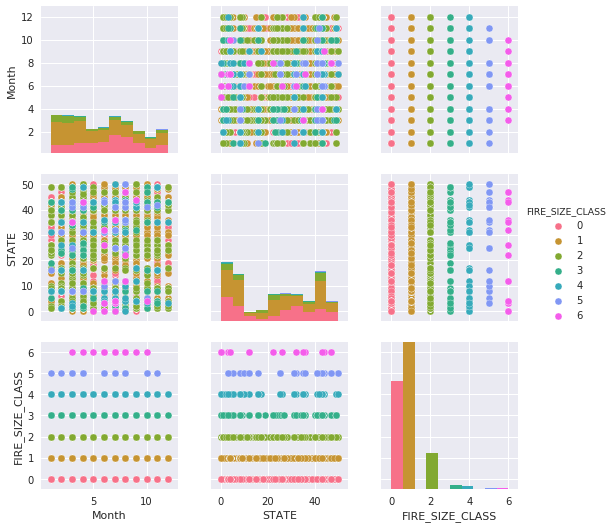

In [100]:
sns.pairplot(fires[['Month', 'STATE', 'FIRE_SIZE_CLASS']], hue='FIRE_SIZE_CLASS')

In [37]:
with open('/home/douglas/Downloads/fire_10000_feats.pkl', 'rb') as picklefile:
    sec = pickle.load(picklefile)
dum = pd.get_dummies(sec['STATE'])
sec_X = pd.concat([sec[['Month']], dum], axis=1)
sec_y = np.array(fires['FIRE_SIZE_CLASS'])
#X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3)


In [38]:
sec_X.head()

,Month,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
961583,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1325851,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
744923,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
52399,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1396378,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
rf9 = RandomForestClassifier(n_estimators=1000, n_jobs=2)
test_features(sec_X, sec_y, rf9)
#sanity check - get dummies work the same as label encoder for random forest, but not logistic

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.59      0.35      0.44      1137
          1       0.62      0.26      0.37      1428
          2       0.21      0.33      0.26       354
          3       0.02      0.14      0.04        42
          4       0.01      0.35      0.03        17
          5       0.01      0.21      0.02        14
          6       0.00      0.12      0.01         8

avg / total       0.54      0.30      0.37      3000

[[399 182  89  88 145 111 123]
 [238 376 319 149 191  75  80]
 [ 32  48 116  51  69  30   8]
 [  6   2  12   6  11   5   0]
 [  1   0   4   1   6   5   0]
 [  3   1   1   4   1   3   1]
 [  1   0   0   1   2   3   1]]


In [51]:
rf9.predict_proba(X_test)

NameError: name 'X_test' is not defined

In [134]:
lr9 = LogisticRegression(C=100000)
test_features(sec_X, sec_y, lr9)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.64      0.18      0.28      1137
          1       0.65      0.22      0.33      1428
          2       0.25      0.36      0.29       354
          3       0.01      0.12      0.03        42
          4       0.00      0.06      0.01        17
          5       0.01      0.43      0.03        14
          6       0.00      0.12      0.00         8

avg / total       0.58      0.22      0.30      3000

[[204 128  69  49 111 203 373]
 [109 315 296 208 106 138 256]
 [  5  37 126  74  32  37  43]
 [  1   2  11   5   9  10   4]
 [  0   0   0  10   1   3   3]
 [  0   0   0   4   2   6   2]
 [  0   1   0   2   1   3   1]]


In [44]:
sec.columns

Index(['FOD_ID', 'SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'FIPS_CODE', 'Month', 'DayofWeek',
       'DISCOVERY_TIME2', 'COUNTY2', 'COUNTY_ID', 'Cause',
       'Prev_Lightning_Fires', 'Prev_Accident_Fires', 'Prev_Arson_Fires',
       'Prev_Other_Fires', 'Prev_A_Fires', 'Prev_B_Fires', 'Prev_C_Fires',
       'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires', 'Prev_G_Fires',
       'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek'],
      dtype='object')

In [49]:
sec_X = pd.concat([sec[['Month','Prev_Lightning_Fires', 'Prev_Accident_Fires', 'Prev_Arson_Fires',
       'Prev_Other_Fires','Prev_A_Fires', 'Prev_B_Fires',
       'Prev_C_Fires', 'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires',
       'Prev_G_Fires', 'LATITUDE',
       'LONGITUDE']], dum], axis=1)
sec_y = np.array(fires['FIRE_SIZE_CLASS'])
lr10 = LogisticRegression(C=100000)
test_features(sec_X, sec_y, lr10)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.60      0.33      0.42      1137
          1       0.68      0.24      0.36      1428
          2       0.28      0.36      0.31       354
          3       0.02      0.19      0.04        42
          4       0.00      0.00      0.00        17
          5       0.02      0.43      0.03        14
          6       0.00      0.00      0.00         8

avg / total       0.59      0.29      0.37      3000

[[371 124  63  59 152 194 174]
 [219 347 262 215 136 130 119]
 [ 22  34 128  69  37  40  24]
 [  1   2  12   8   8   9   2]
 [  3   0   0  11   0   3   0]
 [  0   0   0   3   3   6   2]
 [  0   0   0   3   2   3   0]]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(sec_X, sec_y, test_size=0.3, random_state=57)
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_sample(X_train, y_train)
print('Oversampled dataset shape {}'.format(Counter(y)))
lr10.fit(X, y)
lr10_preds = lr10.predict(X_test)
classes = [0,1,2,3,4,5,6]
print(classification_report(y_test, lr10_preds, labels=classes))
print(confusion_matrix(y_test, lr10_preds, labels=classes))
print(lr10.predict_proba(X_test).shape)

Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.60      0.33      0.42      1137
          1       0.68      0.24      0.36      1428
          2       0.28      0.36      0.31       354
          3       0.02      0.19      0.04        42
          4       0.00      0.00      0.00        17
          5       0.02      0.43      0.03        14
          6       0.00      0.00      0.00         8

avg / total       0.59      0.29      0.37      3000

[[371 124  63  59 152 194 174]
 [219 347 262 215 136 130 119]
 [ 22  34 128  69  37  40  24]
 [  1   2  12   8   8   9   2]
 [  3   0   0  11   0   3   0]
 [  0   0   0   3   3   6   2]
 [  0   0   0   3   2   3   0]]
(3000, 7)


In [82]:
pd.DataFrame(lr10.predict_proba(X_val), columns=['A', 'B', 'C', 'D', 'E', 'F', 'G']).sort_values(by='G', ascending=False)

,A,B,C,D,E,F,G
523,0.006500,0.020745,0.006859,2.451150e-03,0.087930,7.295902e-06,8.755068e-01
1086,0.002853,0.012435,0.004042,1.962026e-01,0.034403,1.344174e-06,7.500628e-01
2540,0.105743,0.048640,0.039482,4.163026e-02,0.021684,1.036092e-05,7.428109e-01
661,0.113864,0.042355,0.033999,4.668695e-02,0.024942,1.452387e-05,7.381385e-01
2409,0.129169,0.052086,0.034327,4.130196e-02,0.015539,1.275497e-05,7.275655e-01
1973,0.003163,0.012363,0.003629,2.172886e-01,0.045971,1.466857e-06,7.175837e-01
1746,0.146184,0.044484,0.037481,4.154778e-02,0.014948,1.921122e-05,7.153358e-01
922,0.126334,0.053999,0.037238,5.002450e-02,0.019122,9.858132e-06,7.132723e-01
364,0.004272,0.010848,0.004186,2.325349e-01,0.037825,2.238456e-06,7.103313e-01
718,0.129674,0.047049,0.035500,5.708338e-02,0.024909,1.366837e-05,7.057709e-01


[0.01       0.01089089 0.01178178 0.01267267 0.01356356]
[1.06174131e-06 3.29877790e-01 1.20645453e-04 3.90198194e-06
 7.96393151e-05]
Logistic Regression Model best F1 score 0.375 at prob decision threshold >= 0.010


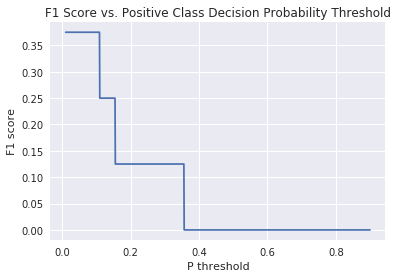

In [97]:
X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.01,0.9,1000)
model_val_probs = lr10.predict_proba(X_val)[:,6] # positive class probs, same basic logistic model we fit in section 2 
print(thresh_ps[:5])
print(model_val_probs[:5])
f1_scores = []
for p in thresh_ps: 
    model_val_labels = model_val_probs >= p #using this line on model will assign desired theshold once determined
    model_val_labels = model_val_labels * 6
    f1_scores.append(precision_score(model_val_labels, y_val, labels=[6], average=None))
  
plt.plot(thresh_ps, f1_scores)
plt.title('F1 Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('F1 score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

#didnt change model but still optimized score

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
test_features(fires_X, fires_y, dt1)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1137
          1       1.00      1.00      1.00      1428
          2       1.00      1.00      1.00       354
          3       1.00      1.00      1.00        42
          4       1.00      1.00      1.00        17
          5       1.00      1.00      1.00        14
          6       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00      3000

[[1137    0    0    0    0    0    0]
 [   0 1428    0    0    0    0    0]
 [   0    0  354    0    0    0    0]
 [   0    0    0   42    0    0    0]
 [   0    0    0    0   17    0    0]
 [   0    0    0    0    0   14    0]
 [   0    0    0    0    0    0    8]]


In [75]:
dum.head()

,0,1,2,3,4,5,6
961583,0,0,1,0,0,0,0
1325851,0,0,1,0,0,0,0
744923,0,1,0,0,0,0,0
52399,0,1,0,0,0,0,0
1396378,0,1,0,0,0,0,0


In [58]:
rf8 = RandomForestClassifier(n_estimators=1000)
test_features(fires_X, fires_y, rf8)

Original dataset shape Counter({1: 1428, 0: 1137, 2: 354, 3: 42, 4: 17, 5: 14, 6: 8})
Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})
             precision    recall  f1-score   support

          0       0.55      0.50      0.52      1137
          1       0.54      0.47      0.50      1428
          2       0.13      0.16      0.15       354
          3       0.01      0.02      0.01        42
          4       0.00      0.00      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.00      0.00         8

avg / total       0.48      0.43      0.45      3000

[[573 360 110  51  24  16   3]
 [382 670 239  70  36  29   2]
 [ 70 195  57  18   6   8   0]
 [ 10  17  13   1   0   1   0]
 [  6   4   5   2   0   0   0]
 [  4   4   2   2   1   0   1]
 [  3   1   2   0   1   1   0]]


In [166]:
rf8.decision_path(X_test)

(<3000x5801758 sparse matrix of type '<class 'numpy.int64'>'
 	with 50197780 stored elements in Compressed Sparse Row format>,
 array([      0,    5597,   11550, ..., 5790316, 5796047, 5801758]))

In [160]:
fires_X = np.array(fires[['Month', 'DayofWeek', 'LATITUDE', 'LONGITUDE', 'Prev_Lightning_Fires', 'Prev_Accident_Fires',
       'Prev_Arson_Fires', 'Prev_Other_Fires', 'Prev_A_Fires', 'Prev_B_Fires',
       'Prev_C_Fires', 'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires',
       'Prev_G_Fires']])
fires_y = np.array(fires['FIRE_SIZE_CLASS'])

In [161]:
X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3, random_state=57)
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_sample(X_train, y_train)
print('Oversampled dataset shape {}'.format(Counter(y)))

rf8 = RandomForestClassifier(n_estimators=1000, class_weight={0:1, 1:1, 2:2, 3:3, 4:4, 5:20, 6:70})
rf8.fit(X, y)
# rf8.fit(X_train, y_train)
rf8_preds = rf8.predict(X_test)
classes = [0,1,2,3,4,5,6]
print(classification_report(y_test, rf8_preds, labels=classes))
print(confusion_matrix(y_test, rf8_preds, labels=classes))
print(rf8.predict_proba(X_test).shape)

Oversampled dataset shape Counter({1: 3494, 0: 3494, 2: 3494, 3: 3494, 6: 3494, 4: 3494, 5: 3494})


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.58      0.59      0.58      1137
          1       0.57      0.66      0.61      1428
          2       0.25      0.12      0.17       354
          3       0.20      0.02      0.04        42
          4       0.00      0.00      0.00        17
          5       0.00      0.00      0.00        14
          6       0.00      0.00      0.00         8

avg / total       0.52      0.55      0.53      3000

[[666 436  32   2   1   0   0]
 [386 948  92   1   0   1   0]
 [ 63 245  44   1   1   0   0]
 [  9  27   5   1   0   0   0]
 [  5   9   3   0   0   0   0]
 [  6   7   0   0   1   0   0]
 [  5   1   2   0   0   0   0]]
(3000, 7)


In [133]:
pd.DataFrame(rf8.predict_proba(X_test)).head()

,0,1,2,3,4,5,6
0,0.358500,0.532500,0.090000,0.003000,0.016000,0.0,0.000
1,0.058000,0.526500,0.404000,0.001500,0.010000,0.0,0.000
2,0.209959,0.599987,0.152987,0.037067,0.000000,0.0,0.000
3,0.478167,0.367833,0.142000,0.010000,0.000000,0.0,0.002
4,0.534586,0.401045,0.000000,0.000000,0.064369,0.0,0.000


In [123]:
print(y_val[y_val == 6])

[6 6 6 6 6 6 6 6]


Logistic Regression Model best F1 score 0.009 at prob decision threshold >= 0.004


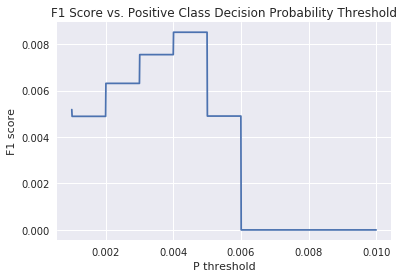

In [163]:
X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.001,.01,1000)
model_val_probs = rf8.predict_proba(X_val)[:,6] # positive class probs, same basic logistic model we fit in section 2 
#print(model_val_probs.shape)
#print(y_val)
f1_scores = []
for p in thresh_ps: 
    model_val_labels = model_val_probs >= p #using this line on model will assign desired theshold once determined
    #print(model_val_labels)
    model_val_labels = model_val_labels * 6
    #print(f1_score(model_val_labels, y_val, labels=[6], average=None)[6])
    f1_scores.append(recall_score(model_val_labels, y_val, labels=[6], average=None))
    
plt.plot(thresh_ps, f1_scores)
plt.title('F1 Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('F1 score')
#print(f1_scores)
best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

#didnt change model but still optimized score

In [159]:
rf8.feature_importances_

array([0.09338025, 0.06690202, 0.16911974, 0.24058888, 0.05824132,
       0.05263697, 0.01364646, 0.02582654, 0.04085956, 0.05807377,
       0.02119647, 0.01552726, 0.0123982 , 0.00120741, 0.00347318,
       0.06415582, 0.06276614])

In [131]:
def test_features_rand(X,y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    print('Original dataset shape {}'.format(Counter(y_test)))
    ros = RandomOverSampler(random_state=42)
    X, y = ros.fit_sample(X_train, y_train)
    print('Oversampled dataset shape {}'.format(Counter(y)))
    model.fit(X, y)
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds, labels=classes))
    print(confusion_matrix(y_test, model_preds, labels=classes))

In [72]:
test_features_rand(fires_X, fires_y, rf8)

Original dataset shape Counter({1: 1478, 0: 1092, 2: 348, 3: 46, 4: 22, 5: 8, 6: 6})
Oversampled dataset shape Counter({0: 3444, 2: 3444, 1: 3444, 3: 3444, 4: 3444, 5: 3444, 6: 3444})
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1092
          1       1.00      1.00      1.00      1478
          2       1.00      1.00      1.00       348
          3       1.00      1.00      1.00        46
          4       1.00      1.00      1.00        22
          5       1.00      1.00      1.00         8
          6       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00      3000

[[1092    0    0    0    0    0    0]
 [   0 1478    0    0    0    0    0]
 [   0    0  348    0    0    0    0]
 [   0    0    0   46    0    0    0]
 [   0    0    0    0   22    0    0]
 [   0    0    0    0    0    8    0]
 [   0    0    0    0    0    0    6]]


In [70]:
def test_features_not_oversampled(X,y, model):
    X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3)
    print('Original dataset shape {}'.format(Counter(y_test)))
    #ros = RandomOverSampler(random_state=42)
    #X, y = ros.fit_sample(X_train, y_train)
    print('Oversampled dataset shape {}'.format(Counter(y)))
    model.fit(X_train, y_train)
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds, labels=classes))
    print(confusion_matrix(y_test, model_preds, labels=classes))

In [71]:
test_features_not_oversampled(fires_X, fires_y, rf8)

Original dataset shape Counter({1: 1435, 0: 1117, 2: 370, 3: 35, 4: 25, 5: 12, 6: 6})
Oversampled dataset shape Counter({1: 4922, 0: 3599, 2: 1197, 3: 137, 4: 87, 5: 38, 6: 20})
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1117
          1       1.00      1.00      1.00      1435
          2       1.00      1.00      1.00       370
          3       1.00      1.00      1.00        35
          4       0.86      1.00      0.93        25
          5       0.90      0.75      0.82        12
          6       1.00      0.67      0.80         6

avg / total       1.00      1.00      1.00      3000

[[1117    0    0    0    0    0    0]
 [   0 1435    0    0    0    0    0]
 [   0    0  370    0    0    0    0]
 [   0    0    0   35    0    0    0]
 [   0    0    0    0   25    0    0]
 [   0    0    0    0    3    9    0]
 [   0    0    0    0    1    1    4]]


In [78]:

#more explicit version of cross-validation. 
#Using KFold like this is very nice if you want to do a bunch of different
#things within your cross-val loop (feature engineering, model parameter
#checking, etc.)

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=5)

for train_ind, val_ind in kf.split(fires_X, fires_y):
    
    rfc = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
    rfc.fit(fires_X[train_ind],fires_y[train_ind])
    rfc_preds = rfc.predict(fires_X[val_ind])
    print('class', classification_report(fires_y[val_ind], rfc_preds, labels=classes))
#     print('f1', f1_score(fires_y[val_ind], rfc_preds, labels=classes, average=None))
#     print('p', precision_score(fires_y[val_ind], rfc_preds, labels=classes, average=None))
#     print('r', recall_score(fires_y[val_ind], rfc_preds, labels=classes, average=None))
    print(confusion_matrix(fires_y[val_ind], rfc_preds))



/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


class              precision    recall  f1-score   support

          0       0.57      0.56      0.56       722
          1       0.58      0.73      0.65       994
          2       0.31      0.05      0.08       233
          3       0.00      0.00      0.00        28
          4       0.00      0.00      0.00        16
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         4

avg / total       0.53      0.57      0.54      2000

[[404 310   8   0   0   0   0]
 [251 729  14   0   0   0   0]
 [ 43 178  11   0   0   1   0]
 [  7  19   1   0   1   0   0]
 [  3  12   1   0   0   0   0]
 [  2   1   0   0   0   0   0]
 [  3   1   0   0   0   0   0]]


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


class              precision    recall  f1-score   support

          0       0.58      0.56      0.57       702
          1       0.59      0.74      0.65      1010
          2       0.28      0.06      0.10       222
          3       0.00      0.00      0.00        30
          4       0.00      0.00      0.00        20
          5       0.00      0.00      0.00        14
          6       0.00      0.00      0.00         2

avg / total       0.53      0.58      0.54      2000

[[395 304   3   0   0   0   0]
 [232 746  30   1   0   0   1]
 [ 32 177  13   0   0   0   0]
 [  8  22   0   0   0   0   0]
 [  9  11   0   0   0   0   0]
 [  5   7   1   0   1   0   0]
 [  1   1   0   0   0   0   0]]


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


class              precision    recall  f1-score   support

          0       0.59      0.56      0.57       747
          1       0.57      0.73      0.64       969
          2       0.22      0.04      0.07       232
          3       0.00      0.00      0.00        22
          4       0.00      0.00      0.00        17
          5       0.00      0.00      0.00         6
          6       0.00      0.00      0.00         7

avg / total       0.52      0.57      0.53      2000

[[417 325   5   0   0   0   0]
 [235 705  28   0   1   0   0]
 [ 34 186  10   2   0   0   0]
 [  9  11   2   0   0   0   0]
 [ 10   6   0   1   0   0   0]
 [  2   4   0   0   0   0   0]
 [  2   4   0   0   1   0   0]]


/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


class              precision    recall  f1-score   support

          0       0.61      0.57      0.59       715
          1       0.57      0.75      0.65       975
          2       0.27      0.04      0.07       256
          3       0.00      0.00      0.00        27
          4       0.00      0.00      0.00        16
          5       0.00      0.00      0.00         9
          6       0.00      0.00      0.00         2

avg / total       0.53      0.57      0.53      2000

[[404 309   1   0   1   0   0]
 [217 732  25   0   0   1   0]
 [ 28 217  11   0   0   0   0]
 [  6  18   3   0   0   0   0]
 [  7   9   0   0   0   0   0]
 [  3   5   1   0   0   0   0]
 [  1   1   0   0   0   0   0]]
class              precision    recall  f1-score   support

          0       0.59      0.55      0.57       713
          1       0.56      0.76      0.65       974
          2       0.17      0.02      0.04       254
          3       0.00      0.00      0.00        30
          4       0.00  

/home/douglas/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
counts = fires['FIRE_SIZE_CLASS'].value_counts().sort_index().values

In [90]:
freq = counts/min(counts)

In [91]:
freq

array([179.95, 246.1 ,  59.85,   6.85,   4.35,   1.9 ,   1.  ])

In [86]:
freq = counts/sum(counts)

In [87]:
freq

array([0.4922, 0.3599, 0.1197, 0.0137, 0.0087, 0.0038, 0.002 ])

In [88]:
freq / (1 - freq)

array([0.96927924, 0.5622559 , 0.13597637, 0.0138903 , 0.00877635,
       0.0038145 , 0.00200401])

In [93]:
rf5 = RandomForestClassifier(n_estimators=1000, class_weight={0:45, 1:60, 2:15, 3:3, 4:2, 5:1, 6:1})
rf5.fit(X_train, y_train)
rf5_preds = rf5.predict(X_test)
print('f1', f1_score(y_test, rf5_preds, labels=classes, average='micro'))
print('p', precision_score(y_test, rf5_preds, labels=classes, average='micro'))
print('r', recall_score(y_test, rf5_preds, labels=classes, average='micro'))
confusion_matrix(y_test, rf5_preds)
#classification 

f1 0.5566666666666666
p 0.5566666666666666
r 0.5566666666666666


array([[ 619,  474,    9,    0,    0,    0,    0],
       [ 377, 1042,   36,    2,    1,    0,    0],
       [  59,  286,    9,    0,    0,    0,    0],
       [  14,   25,    1,    0,    1,    0,    0],
       [   7,   18,    1,    0,    0,    0,    0],
       [   6,    7,    0,    0,    0,    0,    0],
       [   5,    1,    0,    0,    0,    0,    0]])

In [100]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
print('Original dataset shape {}'.format(Counter(y_train)))
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_sample(X_train, y_train)
print('Oversampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 3403, 0: 2545, 2: 856, 3: 88, 4: 65, 5: 30, 6: 13})
Oversampled dataset shape Counter({0: 3403, 1: 3403, 5: 3403, 3: 3403, 2: 3403, 4: 3403, 6: 3403})


In [101]:

rf5 = RandomForestClassifier(n_estimators=1000)
rf5.fit(X, y)
rf5_preds = rf5.predict(X_test)
print('f1', f1_score(y_test, rf5_preds, labels=classes, average='micro'))
print('p', precision_score(y_test, rf5_preds, labels=classes, average='micro'))
print('r', recall_score(y_test, rf5_preds, labels=classes, average='micro'))
confusion_matrix(y_test, rf5_preds)
#classification 

f1 0.5456666666666666
p 0.5456666666666666
r 0.5456666666666666


array([[636, 382,  31,   2,   1,   0,   2],
       [426, 959, 122,   5,   4,   1,   2],
       [ 64, 230,  40,   5,   2,   0,   0],
       [ 15,  22,   8,   1,   2,   1,   0],
       [  5,  13,   2,   1,   1,   0,   0],
       [  1,   4,   3,   0,   0,   0,   0],
       [  3,   2,   1,   0,   1,   0,   0]])

In [103]:
print(classification_report(y_test, rf5_preds, labels=classes))

             precision    recall  f1-score   support

          0       0.55      0.60      0.58      1054
          1       0.59      0.63      0.61      1519
          2       0.19      0.12      0.15       341
          3       0.07      0.02      0.03        49
          4       0.09      0.05      0.06        22
          5       0.00      0.00      0.00         8
          6       0.00      0.00      0.00         7

avg / total       0.52      0.55      0.53      3000



In [104]:
# try just prev size history
fires_X = pd.DataFrame(fires[['Month', 'DayofWeek', 'Prev_A_Fires', 'Prev_B_Fires',
       'Prev_C_Fires', 'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires',
       'Prev_G_Fires']])
fires_y = fires['FIRE_SIZE_CLASS']
X_train, X_test, y_train, y_test = train_test_split(fires_X, fires_y, test_size=0.3)


In [105]:
print('Original dataset shape {}'.format(Counter(y_train)))
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_sample(X_train, y_train)
print('Oversampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 3486, 0: 2498, 2: 815, 3: 101, 4: 62, 5: 24, 6: 14})
Oversampled dataset shape Counter({0: 3486, 1: 3486, 2: 3486, 3: 3486, 4: 3486, 5: 3486, 6: 3486})


In [ ]:
rf4 = RandomForestClassifier(n_estimators=10000, n_jobs=-1)
rf4.fit(X_train, y_train)
rf4_preds = rf4.predict(X_test)
print('f1', f1_score(y_test, rf4_preds, labels=classes, average=None))
print('p', precision_score(y_test, rf4_preds, labels=classes, average=None))
print('r', recall_score(y_test, rf4_preds, labels=classes, average=None))
confusion_matrix(y_test, rf4_preds)

In [164]:
with open('/home/douglas/Downloads/fire_10000_feats.pkl', 'rb') as picklefile:
    fires = pickle.load(picklefile)

In [165]:
fires.head()


,FOD_ID,SOURCE_SYSTEM_TYPE,NWCG_REPORTING_AGENCY,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,Month,DayofWeek,DISCOVERY_TIME2,COUNTY2,COUNTY_ID,Cause,Prev_Lightning_Fires,Prev_Accident_Fires,Prev_Arson_Fires,Prev_Other_Fires,Prev_A_Fires,Prev_B_Fires,Prev_C_Fires,Prev_D_Fires,Prev_E_Fires,Prev_F_Fires,Prev_G_Fires,Prev_Fires_Same_Month,Prev_Fires_Same_DayofWeek
961583,1089848,NONFED,ST/C&L,1992,1992-01-01,1,None,6.0,Railroad,10.00,C,25.950000,-80.450000,FL,Miami Dade,086,1,Wednesday,NaN,miami dade,Miami Dade,Accident,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325851,1804837,NONFED,ST/C&L,1992,1992-01-02,2,1300,7.0,Arson,17.00,C,37.490016,-81.906985,WV,McDowell,047,1,Thursday,1300.0,mcdowell,McDowell,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744923,844425,NONFED,ST/C&L,1992,1992-01-02,2,None,13.0,Missing/Undefined,1.00,B,33.558333,-80.329167,SC,14,027,1,Thursday,NaN,clarendon,45027,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52399,52822,FED,FS,1992,1992-01-04,4,1400,7.0,Arson,1.00,B,31.483333,-88.750000,MS,None,None,1,Saturday,1400.0,wayne,28153,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396378,19092298,NONFED,ST/C&L,1992,1992-01-10,10,1358,7.0,Arson,0.93,B,32.492100,-81.526300,GA,Effingham,103,1,Friday,1358.0,effingham,Effingham,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
